In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read train dataset
data = pd.read_csv("train.csv", sep = ";")
#Read test dataset
test = pd.read_csv("test.csv", sep = ";")

In [3]:
#removeduplicate
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop('index', axis = 1)

In [4]:
#check NA values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5615 non-null   float64
 1   volatile acidity      5615 non-null   float64
 2   citric acid           5615 non-null   float64
 3   residual sugar        5615 non-null   float64
 4   chlorides             5615 non-null   float64
 5   free sulfur dioxide   5615 non-null   int64  
 6   total sulfur dioxide  5615 non-null   int64  
 7   density               5615 non-null   float64
 8   pH                    5615 non-null   float64
 9   sulphates             5615 non-null   float64
 10  alcohol               5615 non-null   float64
 11  quality               5615 non-null   int64  
 12  type                  5615 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 570.4+ KB


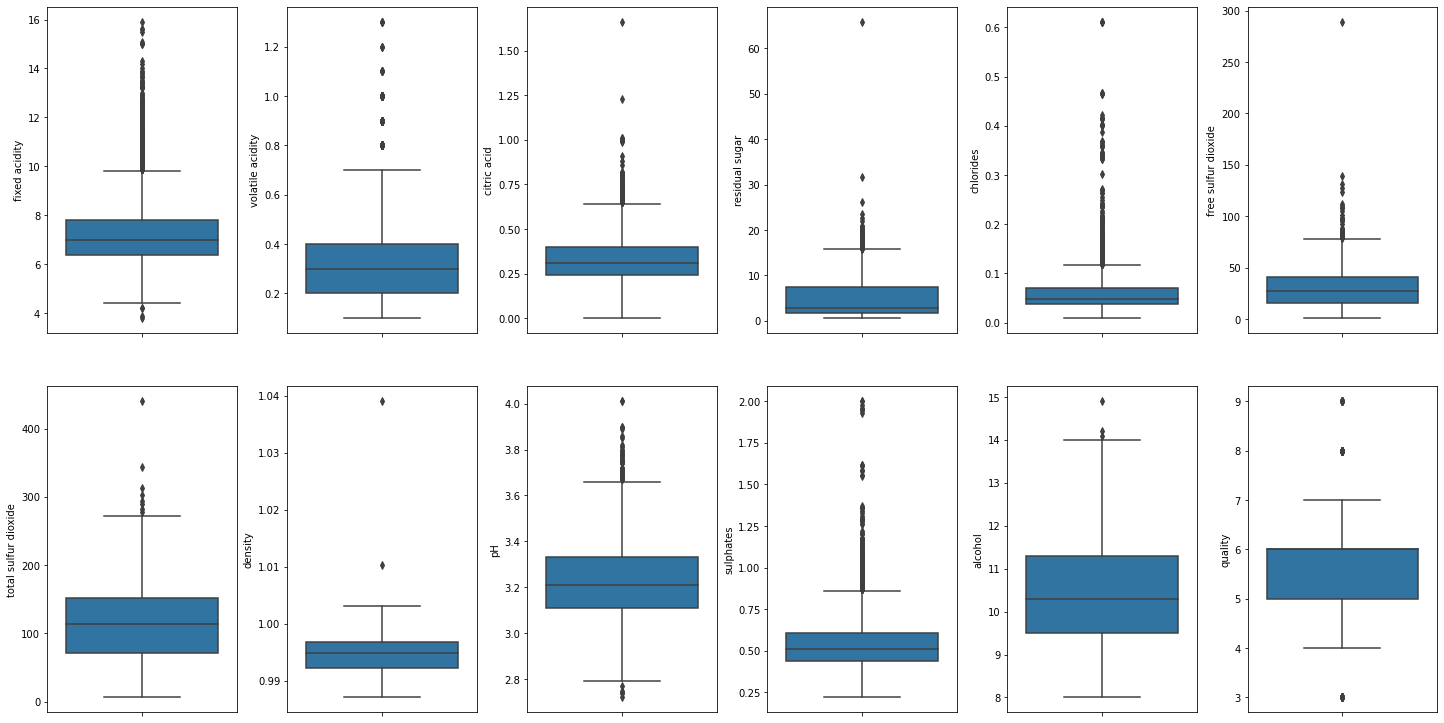

In [5]:
#visualize plot of each feature
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [6]:
feature = 'density'
i = 5
upper_limit = data[feature].mean() + i*data[feature].std()
lower_limit = data[feature].mean() - i*data[feature].std()
data = data.loc[(data[feature] <= upper_limit) | (data[feature] >= lower_limit)]

feature = 'fixed acidity'
i = 2
upper_limit = data[feature].mean() + i*data[feature].std()
lower_limit = data[feature].mean() - i*data[feature].std()
data_1 = data.loc[(data[feature] >= upper_limit) | (data[feature] <= lower_limit)]
feature = 'citric acid'
i = 1.5
upper_limit = data[feature].mean() + i*data[feature].std()
lower_limit = data[feature].mean() - i*data[feature].std()
data_2 = data.loc[(data[feature] >= upper_limit) | (data[feature] <= lower_limit)]
feature = 'pH'
i = 1
upper_limit = data[feature].mean() + i*data[feature].std()
lower_limit = data[feature].mean() - i*data[feature].std()
data_3 = data.loc[(data[feature] >= upper_limit) | (data[feature] <= lower_limit)]
feature = 'sulphates'
i = 0.5
upper_limit = data[feature].mean() + i*data[feature].std()
lower_limit = data[feature].mean() - i*data[feature].std()
data_4 = data.loc[(data[feature] >= upper_limit) | (data[feature] <= lower_limit)]
feature = 'alcohol'
i = 1.5
upper_limit = data[feature].mean() + i*data[feature].std()
lower_limit = data[feature].mean() - i*data[feature].std()
data_5 = data.loc[(data[feature] >= upper_limit) | (data[feature] <= lower_limit)]

In [7]:
data_con1 = pd.merge(data_1,data_2)
data_con2 = pd.merge(data_3,data_4)
data_merge1 = pd.merge(data_con1,data_con2)
data_outlier = pd.merge(data_merge1,data_5)
data_outlier

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,14.3,0.3,0.74,1.8,0.075,6,15,1.0008,2.86,0.79,8.4,6,red
1,3.8,0.3,0.02,11.1,0.036,20,114,0.9925,3.75,0.44,12.4,6,white
2,15.9,0.4,0.65,7.5,0.096,22,71,0.9976,2.98,0.84,14.9,5,red


In [8]:
data[(data['fixed acidity']==14.3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1770,14.3,0.3,0.74,1.8,0.075,6,15,1.0008,2.86,0.79,8.4,6,red


In [9]:
data[(data['fixed acidity']==3.8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3581,3.8,0.3,0.02,11.1,0.036,20,114,0.9925,3.75,0.44,12.4,6,white


In [10]:
data[(data['fixed acidity']==15.9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4512,15.9,0.4,0.65,7.5,0.096,22,71,0.9976,2.98,0.84,14.9,5,red


In [11]:
data = data.drop(labels=[1770])
data = data.drop(labels=[3581])
data = data.drop(labels=[4512])
data = data.reset_index()
data = data.drop('index', axis = 1)

In [12]:
data.type = data.type.apply(lambda x : x.replace("white","1"))
data.type = data.type.apply(lambda x : x.replace("red","0"))
test.type = test.type.apply(lambda x : x.replace("white","1"))
test.type = test.type.apply(lambda x : x.replace("red","0"))
data = data.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)

In [13]:
#correlation
correlation = data.corr()
display(correlation)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.223616,0.321444,-0.119434,0.291979,-0.297601,-0.345499,0.497562,-0.248284,0.341752,-0.119282,-0.058094,-0.505948
volatile acidity,0.223616,1.000000,-0.383466,-0.184130,0.357987,-0.363426,-0.411434,0.323661,0.257485,0.235763,-0.105441,-0.262774,-0.651959
citric acid,0.321444,-0.383466,1.000000,0.145740,0.061539,0.141622,0.202180,0.080536,-0.345053,0.073256,0.019728,0.103423,0.193234
residual sugar,-0.119434,-0.184130,0.145740,1.000000,-0.140991,0.412997,0.497922,0.489146,-0.239436,-0.189968,-0.283855,-0.044103,0.347695
chlorides,0.291979,0.357987,0.061539,-0.140991,1.000000,-0.203028,-0.278213,0.370789,0.022305,0.453551,-0.276199,-0.195365,-0.504762
free sulfur dioxide,-0.297601,-0.363426,0.141622,0.412997,-0.203028,1.000000,0.731010,-0.020642,-0.149692,-0.209927,-0.135022,0.067042,0.487866
total sulfur dioxide,-0.345499,-0.411434,0.202180,0.497922,-0.278213,0.731010,1.000000,-0.021121,-0.230096,-0.279219,-0.209512,-0.034059,0.693811
density,0.497562,0.323661,0.080536,0.489146,0.370789,-0.020642,-0.021121,1.000000,0.049859,0.300715,-0.676084,-0.312987,-0.461388
pH,-0.248284,0.257485,-0.345053,-0.239436,0.022305,-0.149692,-0.230096,0.049859,1.000000,0.141695,0.074615,0.018671,-0.317636
sulphates,0.341752,0.235763,0.073256,-0.189968,0.453551,-0.209927,-0.279219,0.300715,0.141695,1.000000,-0.048281,0.024427,-0.494697


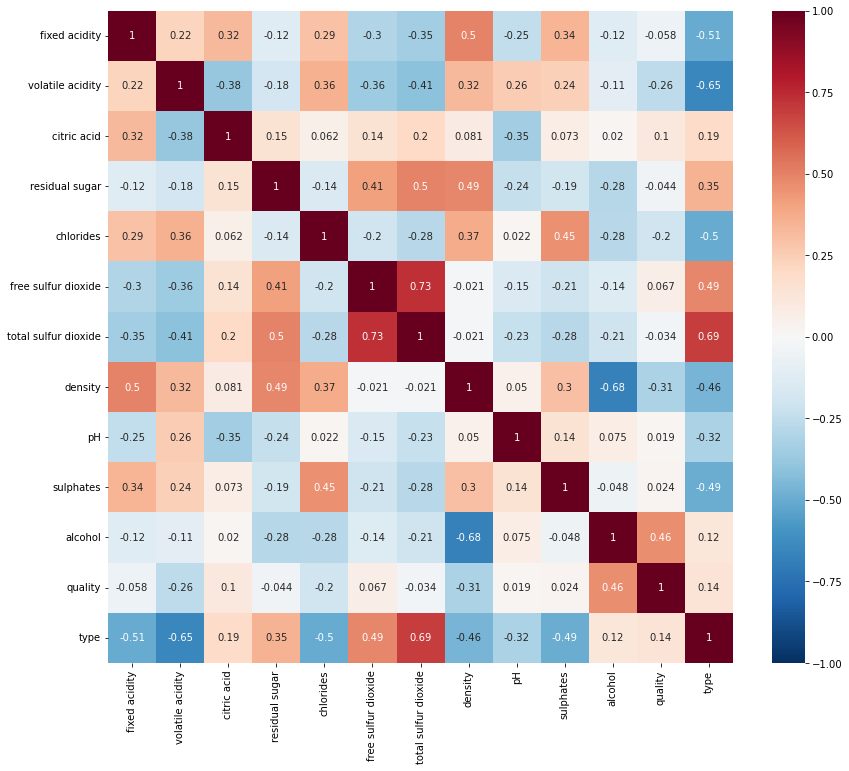

In [14]:
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [15]:
#drop feature
data_new = data.drop('fixed acidity', axis = 1)
data_new = data_new.drop('residual sugar', axis = 1)
test_new = test.drop('fixed acidity', axis = 1)
test_new = test_new.drop('residual sugar', axis = 1)

In [16]:
#add more feature
brix_d = (data['alcohol']-data['residual sugar'])/data['free sulfur dioxide']
brix_t = (test['alcohol']-test['residual sugar'])/test['free sulfur dioxide']
data_new['brix'] = brix_d
test_new['brix'] = brix_t

In [17]:
#update correlation
correlation_new = data_new.corr()
display(correlation_new)

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,brix
volatile acidity,1.000000,-0.383466,0.357987,-0.363426,-0.411434,0.323661,0.257485,0.235763,-0.105441,-0.262774,-0.651959,0.292370
citric acid,-0.383466,1.000000,0.061539,0.141622,0.202180,0.080536,-0.345053,0.073256,0.019728,0.103423,0.193234,-0.093026
chlorides,0.357987,0.061539,1.000000,-0.203028,-0.278213,0.370789,0.022305,0.453551,-0.276199,-0.195365,-0.504762,0.191415
free sulfur dioxide,-0.363426,0.141622,-0.203028,1.000000,0.731010,-0.020642,-0.149692,-0.209927,-0.135022,0.067042,0.487866,-0.608826
total sulfur dioxide,-0.411434,0.202180,-0.278213,0.731010,1.000000,-0.021121,-0.230096,-0.279219,-0.209512,-0.034059,0.693811,-0.621313
density,0.323661,0.080536,0.370789,-0.020642,-0.021121,1.000000,0.049859,0.300715,-0.676084,-0.312987,-0.461388,-0.090095
pH,0.257485,-0.345053,0.022305,-0.149692,-0.230096,0.049859,1.000000,0.141695,0.074615,0.018671,-0.317636,0.170316
sulphates,0.235763,0.073256,0.453551,-0.209927,-0.279219,0.300715,0.141695,1.000000,-0.048281,0.024427,-0.494697,0.218180
alcohol,-0.105441,0.019728,-0.276199,-0.135022,-0.209512,-0.676084,0.074615,-0.048281,1.000000,0.461989,0.121359,0.182535
quality,-0.262774,0.103423,-0.195365,0.067042,-0.034059,-0.312987,0.018671,0.024427,0.461989,1.000000,0.138879,-0.052803


In [18]:
#take data train
x = data_new.drop('quality',axis=1)
y = data_new['quality']
#take data test
idt = test_new['id']
xt = test_new.drop('id',axis = 1)

In [19]:
#split data by type red and white wine
data_w = data_new[data_new.type == 1]
data_r = data_new[data_new.type == 0]
test_w = test_new[test_new.type == 1]
test_r = test_new[test_new.type == 0]
#selection train dataset
x_w = data_w.drop('quality',axis = 1)
x_w = x_w.drop('type',axis = 1)
y_w = data_w['quality']
x_r = data_r.drop('quality',axis = 1)
x_r = x_r.drop('type',axis = 1)
y_r = data_r['quality']
#selection test data
idt_w = test_w['id']
xt_w = test_w.drop('id',axis = 1)
xt_w = xt_w.drop('type',axis = 1)
idt_r = test_r['id']
xt_r = test_r.drop('id',axis = 1)
xt_r = xt_r.drop('type',axis = 1)

In [20]:
# Split data to train and test
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid= train_test_split(x,y,train_size =0.85,test_size=0.15,random_state = 0)

In [21]:
# Split data to train and test
from sklearn.model_selection import train_test_split
x_w_train,x_w_valid,y_w_train,y_w_valid= train_test_split(x_w,y_w,train_size = 0.85,test_size=0.15,random_state = 0)

In [22]:
from sklearn.model_selection import train_test_split
x_r_train,x_r_valid,y_r_train,y_r_valid= train_test_split(x_r,y_r,train_size =0.85,test_size=0.15,random_state = 0)

In [23]:
#normalization data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xvalid = norm_fit.transform(x_valid)
new_xt = norm_fit.transform(xt)

In [24]:
#normalization data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_w_fit = norm.fit(x_w_train)
new_x_w_train = norm_w_fit.transform(x_w_train)
new_x_w_valid = norm_w_fit.transform(x_w_valid)
new_xt_w = norm_w_fit.transform(xt_w)

In [25]:
#normalization test data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_r_fit = norm.fit(x_r_train)
new_x_r_train = norm_r_fit.transform(x_r_train)
new_x_r_valid = norm_r_fit.transform(x_r_valid)
new_xt_r = norm_r_fit.transform(xt_r)

In [26]:
###toCSV
#include type
new_xtrain = pd.DataFrame(new_xtrain)
y_train = pd.DataFrame(y_train)
new_xvalid = pd.DataFrame(new_xvalid)
y_valid = pd.DataFrame(y_valid)
new_xt = pd.DataFrame(new_xt)
idt = pd.DataFrame(idt)
new_xtrain.to_csv("new_xtrain.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
new_xvalid.to_csv("new_xvalid.csv",index=False)
y_valid.to_csv("y_valid.csv",index=False)
new_xt.to_csv("new_xt.csv",index=False)
idt.to_csv("idt.csv",index=False)

#split type
new_x_w_train = pd.DataFrame(new_x_w_train)
y_w_train = pd.DataFrame(y_w_train)
new_x_w_valid = pd.DataFrame(new_x_w_valid)
y_w_valid = pd.DataFrame(y_w_valid)
new_xt_w = pd.DataFrame(new_xt_w)
idt_w = pd.DataFrame(idt_w)

new_x_w_train.to_csv("new_x_w_train.csv",index=False)
y_w_train.to_csv("y_w_train.csv",index=False)
new_x_w_valid.to_csv("new_x_w_valid.csv",index=False)
y_w_valid.to_csv("y_w_valid.csv",index=False)
new_xt_w.to_csv("new_xt_w.csv",index=False)
idt_w.to_csv("idt_w.csv",index=False)

new_x_r_train = pd.DataFrame(new_x_r_train)
y_r_train = pd.DataFrame(y_r_train)
new_x_r_valid = pd.DataFrame(new_x_r_valid)
y_r_valid = pd.DataFrame(y_r_valid)
new_xt_r = pd.DataFrame(new_xt_r)
idt_r = pd.DataFrame(idt_r)

new_x_r_train.to_csv("new_x_r_train.csv",index=False)
y_r_train.to_csv("y_r_train.csv",index=False)
new_x_r_valid.to_csv("new_x_r_valid.csv",index=False)
y_r_valid.to_csv("y_r_valid.csv",index=False)
new_xt_r.to_csv("new_xt_r.csv",index=False)
idt_r.to_csv("idt_r.csv",index=False)